## 监督学习要解决的问题
监督学习包含两个数据集：
- 特征数据集X
- 目标（标签）集y。通常情况下，y是一维数组，长度是样本大小`n_samples`

所有监督学习的模型实现`fit(X, y)`方法来训练模型，使用`predict(X)`来用模型做预测

## 最近邻和维度诅咒

鸢尾花iris数据集是一个分类任务。

有3种不同的鸢尾花(Setosa, Versicolour, and Virginica)

我们的任务是根据特征（花瓣大小，萼片长度，萼片宽度）来进行分类

下面是在用matplotlib画出的数据集的图像

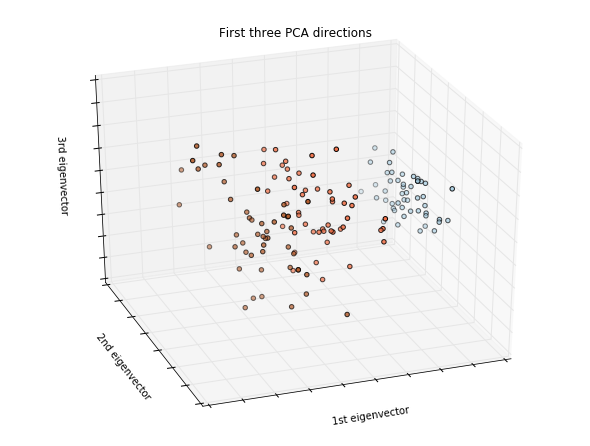

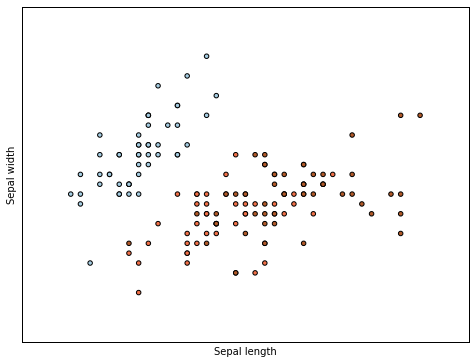

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Paired)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

可以看到有三个不同的类别

In [5]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
np.unique(iris_y)

array([0, 1, 2])

### KNN分类器
对于上面的问题，KNN可能是最简单的分类器。

首先，需要划分训练集和测试集，这里将最后十个数据作为测试集

In [6]:
# Split iris data in train and test data
# A random permutation, to split the data randomly
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test  = iris_X[indices[-10:]]
iris_y_test  = iris_y[indices[-10:]]

创建KNN分类器，进行训练

In [7]:
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

用训练好的模型进行预测,和实际结果比对

In [8]:
print(knn.predict(iris_X_test))
print(iris_y_test)

[1 2 1 0 0 0 2 1 2 0]
[1 1 1 0 0 0 2 1 2 0]


### 维度诅咒
具体可以查看[维基百科](https://www.wikiwand.com/en/Curse_of_dimensionality)

## 线性模型：从回归到稀疏
这里采用了糖尿病的数据集。包含442个病人的10个生理变量特征（年龄，性别，体重，血压等），标签是一年后的疾病指标。

我们先切分数据集。最后20个数据集作为测试集。

In [10]:
diabetes = datasets.load_diabetes()
diabetes_X_train = diabetes.data[:-20]
diabetes_X_test  = diabetes.data[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test  = diabetes.target[-20:]

### 线性回归
原理这里不介绍了。建议google。

采用线性模型对训练样本进行训练。

In [13]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

查看参数

In [14]:
print(regr.coef_)

[ 938.23786125]


计算均方误差

In [15]:
# The mean square error
np.mean((regr.predict(diabetes_X_test)-diabetes_y_test)**2)

2548.0723987259698

计算训练出模型的准确率

In [16]:
# Explained variance score: 1 is perfect prediction
# and 0 means that there is no linear relationship
# between X and y.
regr.score(diabetes_X_test, diabetes_y_test) 

0.47257544798227141

画出图像

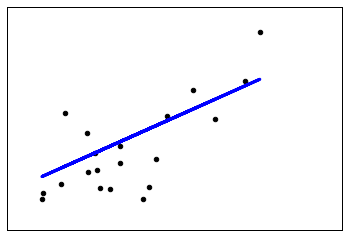

In [17]:
import matplotlib.pyplot as plt

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### 收缩
如果在每一个维度上数据很少，那么样本中的噪音将会导致高方差（ high variance）

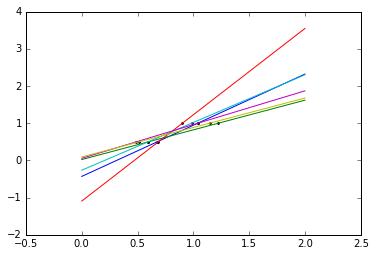

In [19]:
X = np.c_[ .5, 1].T
y = [.5, 1]
test = np.c_[ 0, 2].T
regr = linear_model.LinearRegression()

import matplotlib.pyplot as plt 
%matplotlib inline
plt.figure() 

np.random.seed(0)
for _ in range(6): 
   this_X = .1*np.random.normal(size=(2, 1)) + X
   regr.fit(this_X, y)
   plt.plot(test, regr.predict(test)) 
   plt.scatter(this_X, y, s=3)  

在高维情况下，一个解决办法是：采用岭回归，收缩回归系数到接近于0.

查了一下[资料](http://blog.csdn.net/google19890102/article/details/27228279)，岭回归其实就是正则化。

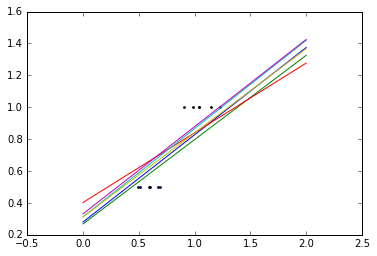

In [20]:
regr = linear_model.Ridge(alpha=.1)

plt.figure() 

np.random.seed(0)
for _ in range(6): 
   this_X = .1*np.random.normal(size=(2, 1)) + X
   regr.fit(this_X, y)
   plt.plot(test, regr.predict(test)) 
   plt.scatter(this_X, y, s=3) 

这里涉及到了`alpha`参数的的选择问题。

alpha参数选择过大的话就会让线性模型的参数过小，造成高的偏差(bias)和低的方差（bias）

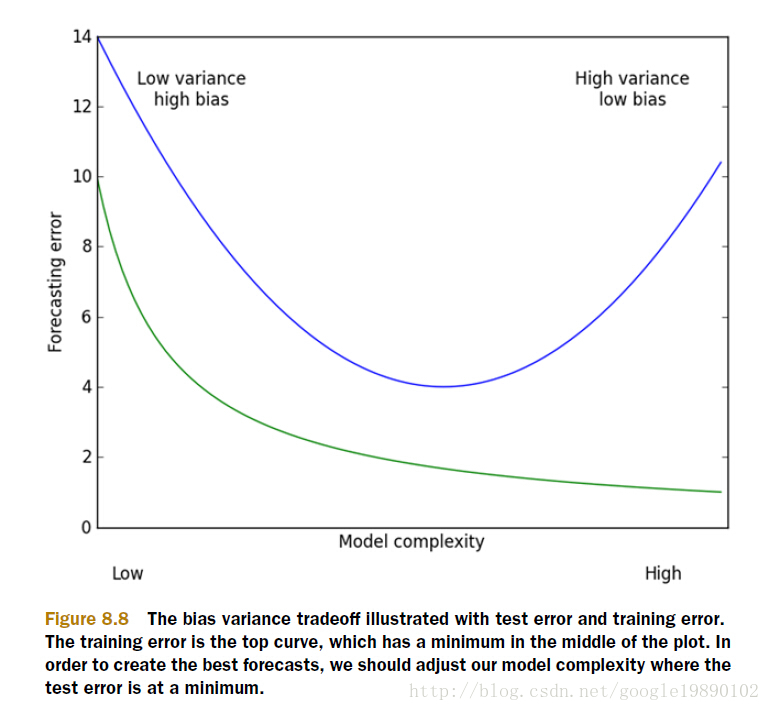

用不同的alpha（在-4到-1之间选择6个点），检测准确率

In [21]:
alphas = np.logspace(-4, -1, 6)
from __future__ import print_function
print([regr.set_params(alpha=alpha
            ).fit(diabetes_X_train, diabetes_y_train,
            ).score(diabetes_X_test, diabetes_y_test) for alpha in alphas]) 

[0.47255235801925194, 0.47248350131491634, 0.47220902528656805, 0.47111084422404531, 0.46665913731369962, 0.44804367281067825]


### 稀疏
糖尿病的数据集有11个维度（10个特征维度和一个标签维度）。

可以想想这个空间会十分**稀疏**。

首先画个图看看

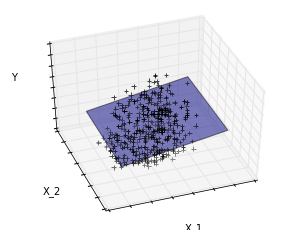

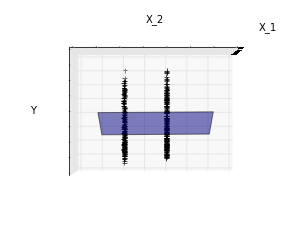

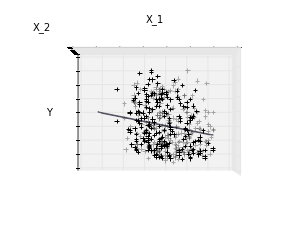

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

from sklearn import datasets, linear_model

diabetes = datasets.load_diabetes()
indices = (0, 1)

X_train = diabetes.data[:-20, indices]
X_test = diabetes.data[-20:, indices]
y_train = diabetes.target[:-20]
y_test = diabetes.target[-20:]

ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)


def plot_figs(fig_num, elev, azim, X_train, clf):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, elev=elev, azim=azim)

    ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c='k', marker='+')
    ax.plot_surface(np.array([[-.1, -.1], [.15, .15]]),
                    np.array([[-.1, .15], [-.1, .15]]),
                    clf.predict(np.array([[-.1, -.1, .15, .15],
                                          [-.1, .15, -.1, .15]]).T
                                ).reshape((2, 2)),
                    alpha=.5)
    ax.set_xlabel('X_1')
    ax.set_ylabel('X_2')
    ax.set_zlabel('Y')
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

#Generate the three different figures from different views
elev = 43.5
azim = -110
plot_figs(1, elev, azim, X_train, ols)

elev = -.5
azim = 0
plot_figs(2, elev, azim, X_train, ols)

elev = -.5
azim = 90
plot_figs(3, elev, azim, X_train, ols)

plt.show()

可以看到，相对于特征x2，x1对Y传递的影响是相对要小的。

对于这个问题，我们可以挑选那些有比较多信息量的特征，忽略那些没有什么信息量的特征，比如X2。

**岭回归**会降低这些特征对结果的影响（通过减小参数），但是它不会将参数减小到0.

另外还有一种处罚措施，叫做**Lasso**，其可以将没有信息量的特征调到0.

具体的分析可以看[这篇文章](http://blog.csdn.net/xbinworld/article/details/44276389)。

In [25]:
regr = linear_model.Lasso()
scores = [regr.set_params(alpha=alpha
            ).fit(diabetes_X_train, diabetes_y_train
            ).score(diabetes_X_test, diabetes_y_test)
       for alpha in alphas]
best_alpha = alphas[scores.index(max(scores))]
regr.alpha = best_alpha
regr.fit(diabetes_X_train, diabetes_y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

选择了最优参数后，打印出训练结果

In [28]:
print(regr.coef_)

[ 938.19370439]


## 分类
对于鸢尾花的任务，不能使用线性模型来分类，应该要使用**逻辑回归**。

In [29]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(iris_X_train, iris_y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

逻辑回归中也有收缩和稀疏问题。

参数C相当于正则化参数：C的值大意味着更少的正则化参数。

另外，可以指定参数，penalty="l2"适合处理非稀疏空间；penalty="l1"适合稀疏空间。

#### 一个小练习
对于数字识别的数据集。尝试使用KNN和线性模型（逻辑回归）。使用最少10%的数据作为测试集，比较两种方法的准确率。

解答如下：

In [31]:
from sklearn import datasets, neighbors, linear_model

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

n_samples = len(X_digits)
n_slice = int(n_samples * 0.6)

np.random.seed(0) #打乱顺序
indices = np.random.permutation(n_samples)
X_train = X_digits[indices[:n_slice]]
y_train = y_digits[indices[:n_slice]]
X_test  = X_digits[indices[n_slice:]]
y_test  = y_digits[indices[n_slice:]]

knn = neighbors.KNeighborsClassifier()
logistic = linear_model.LogisticRegression()

print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))
print('LogisticRegression score: %f'
      % logistic.fit(X_train, y_train).score(X_test, y_test))

KNN score: 0.983310
LogisticRegression score: 0.952712


## 支持向量机
支持向量机属于判别模型。

支持向量机有两种：
- 正则化的支持向量机（默认）。需要输入正则参数C。C小时意味着使用更多的数据来计算分割线（更加正则化）；C大时意味着更少正则化。
- 非正则化的支持向量机

**例子**：对鸢尾花数据集使用支持向量机

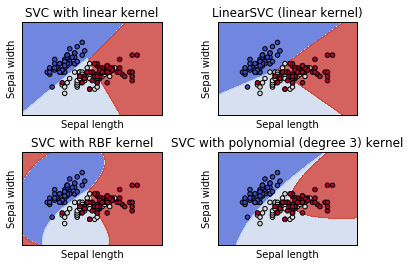

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

**支持向量机可以用来回归和分类**：
- SVR(Support Vector Regression)
- SVC (Support Vector Classification)

支持向量机的一个小例子：

In [34]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(iris_X_train, iris_y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

注意：要想得到一个好的预测值，一般需要对各个特征值进行**正则化**。

### 使用核
例子：使用高斯核

In [35]:
svc = svm.SVC(kernel='rbf')